In [13]:
import numpy as np
import os
import h5py
import sys
import pathlib

In [14]:
folder = pathlib.Path(
    'C:/Users/giaco/OneDrive/Desktop/LOUVAIN-LA-NEUVE/MODELING/HybriDFEM-3-master NEW VERSION/Objects')
sys.path.append(str(folder))

import Structure as st
import Material as mat
import Surface as surf
import Contact as ct
import ContactPair as cp

save_path = os.getcwd()

19 interfaces detected


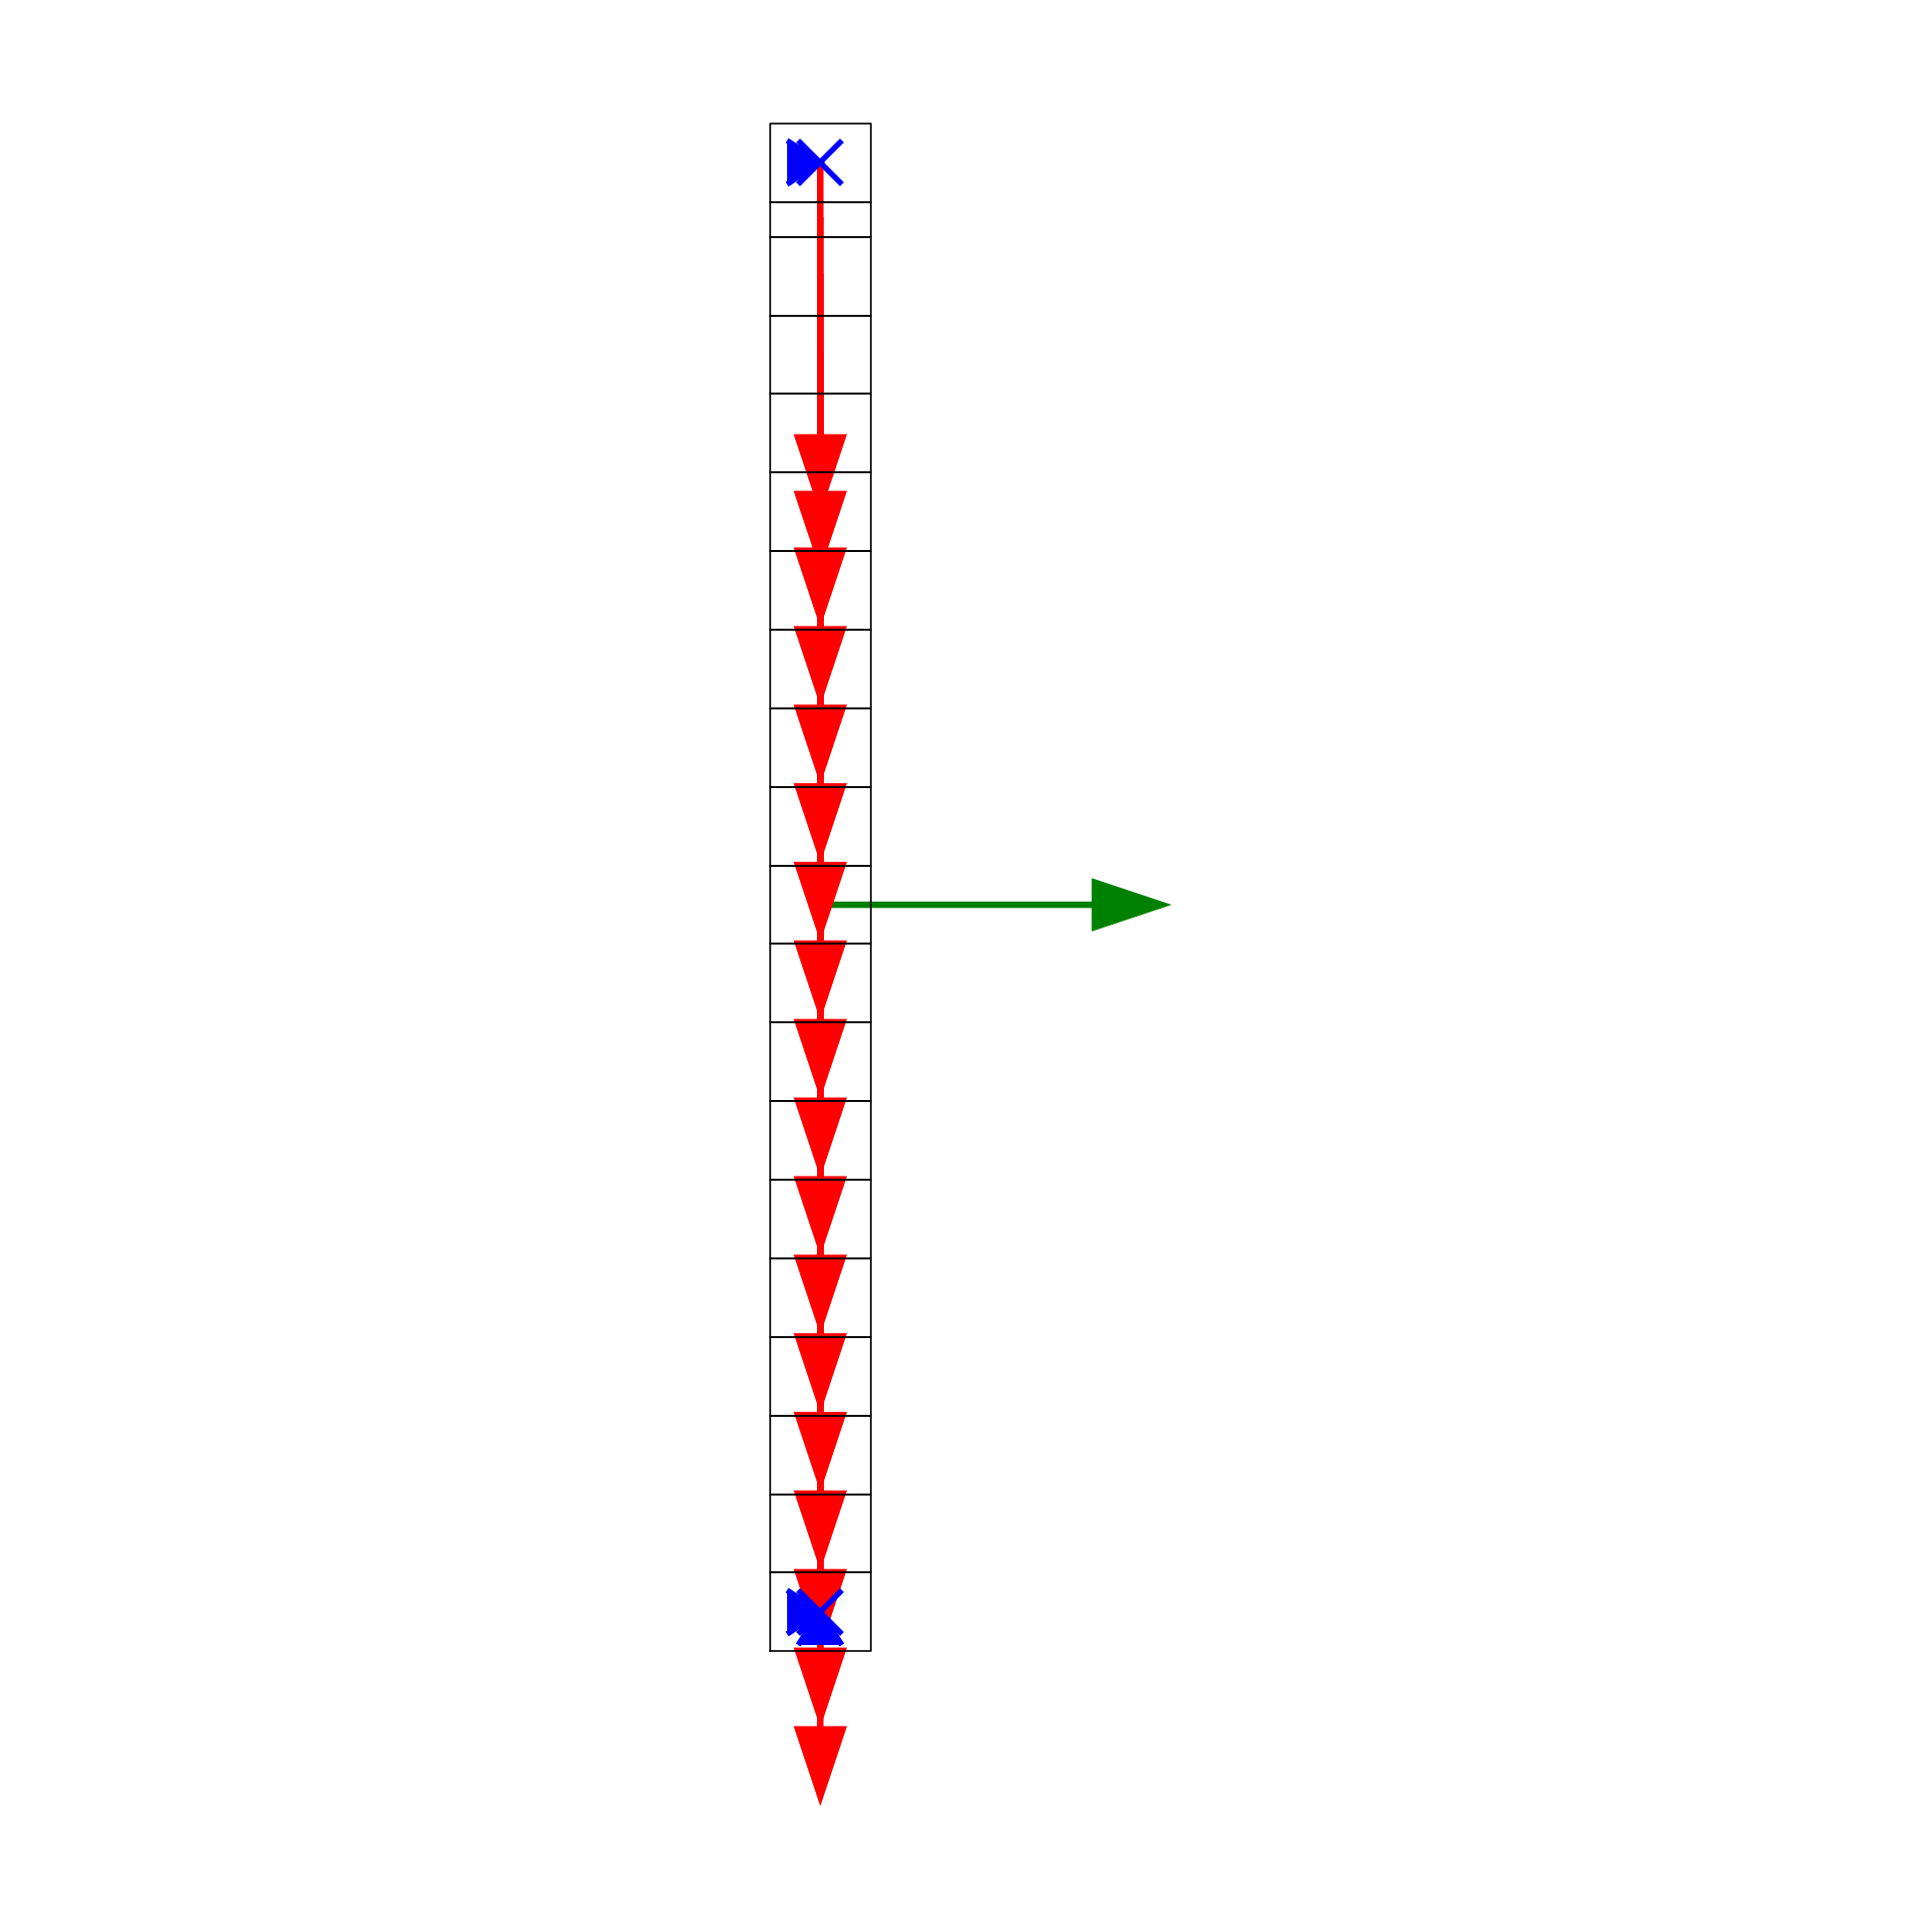

In [15]:
A = (110e-3) * (950e-3)  #m^2
phi_r = 35 * np.pi / 180  #rad

E_m = 43e6  #Pa
nu = 0.0

h_b = 86e-3  #m
t_w = 110e-3  #m

kn = E_m / h_b * ((t_w - 0.002) / (t_w))  #Pa/m
ks = kn / (2 * (1 + nu))  #Pa/m

mu = np.tan(phi_r)

St = st.Structure_2D()

St.add_geometry(
    filepath=r"C:\Users\giaco\OneDrive\Desktop\LOUVAIN-LA-NEUVE\MODELING\HybriDFEM-3-master NEW VERSION\Benchmarks validation\Griffith wall\Specimen 12\Griffith_wall_text_file_12.txt",
    rho=1800, material=None, gravity=False)

St.make_cfs(lin_geom=True, nb_cps=10, offset=-1, surface=surf.Coulomb(2 * kn, 2 * ks, mu))

St.get_M_str()

for i in range(2, 20):
    M = St.list_blocks[i].m
    W = 9.81 * M
    St.loadNode(i, [1], -W, fixed=True)

M_tot = sum(blk.m for blk in St.list_blocks)
W_tot = 9.81 * M_tot

St.plot_structure(scale=0, plot_cf=False, plot_forces=True)  #undeformed configuration

Disp. Increment 1 converged after 1 iterations
Disp. Increment 2 converged after 2 iterations
Disp. Increment 3 converged after 3 iterations
Disp. Increment 4 converged after 2 iterations
Disp. Increment 5 converged after 2 iterations
Disp. Increment 6 converged after 2 iterations
Disp. Increment 7 converged after 2 iterations
Disp. Increment 8 converged after 1 iterations
Disp. Increment 9 converged after 1 iterations
Disp. Increment 10 converged after 1 iterations
Disp. Increment 11 converged after 2 iterations
Disp. Increment 12 converged after 1 iterations
Disp. Increment 13 converged after 1 iterations
Disp. Increment 14 converged after 1 iterations
Disp. Increment 15 converged after 1 iterations
Disp. Increment 16 converged after 2 iterations
Disp. Increment 17 converged after 2 iterations
Disp. Increment 18 converged after 2 iterations
Disp. Increment 19 converged after 2 iterations
Disp. Increment 20 converged after 2 iterations
Disp. Increment 21 converged after 2 iterations
D

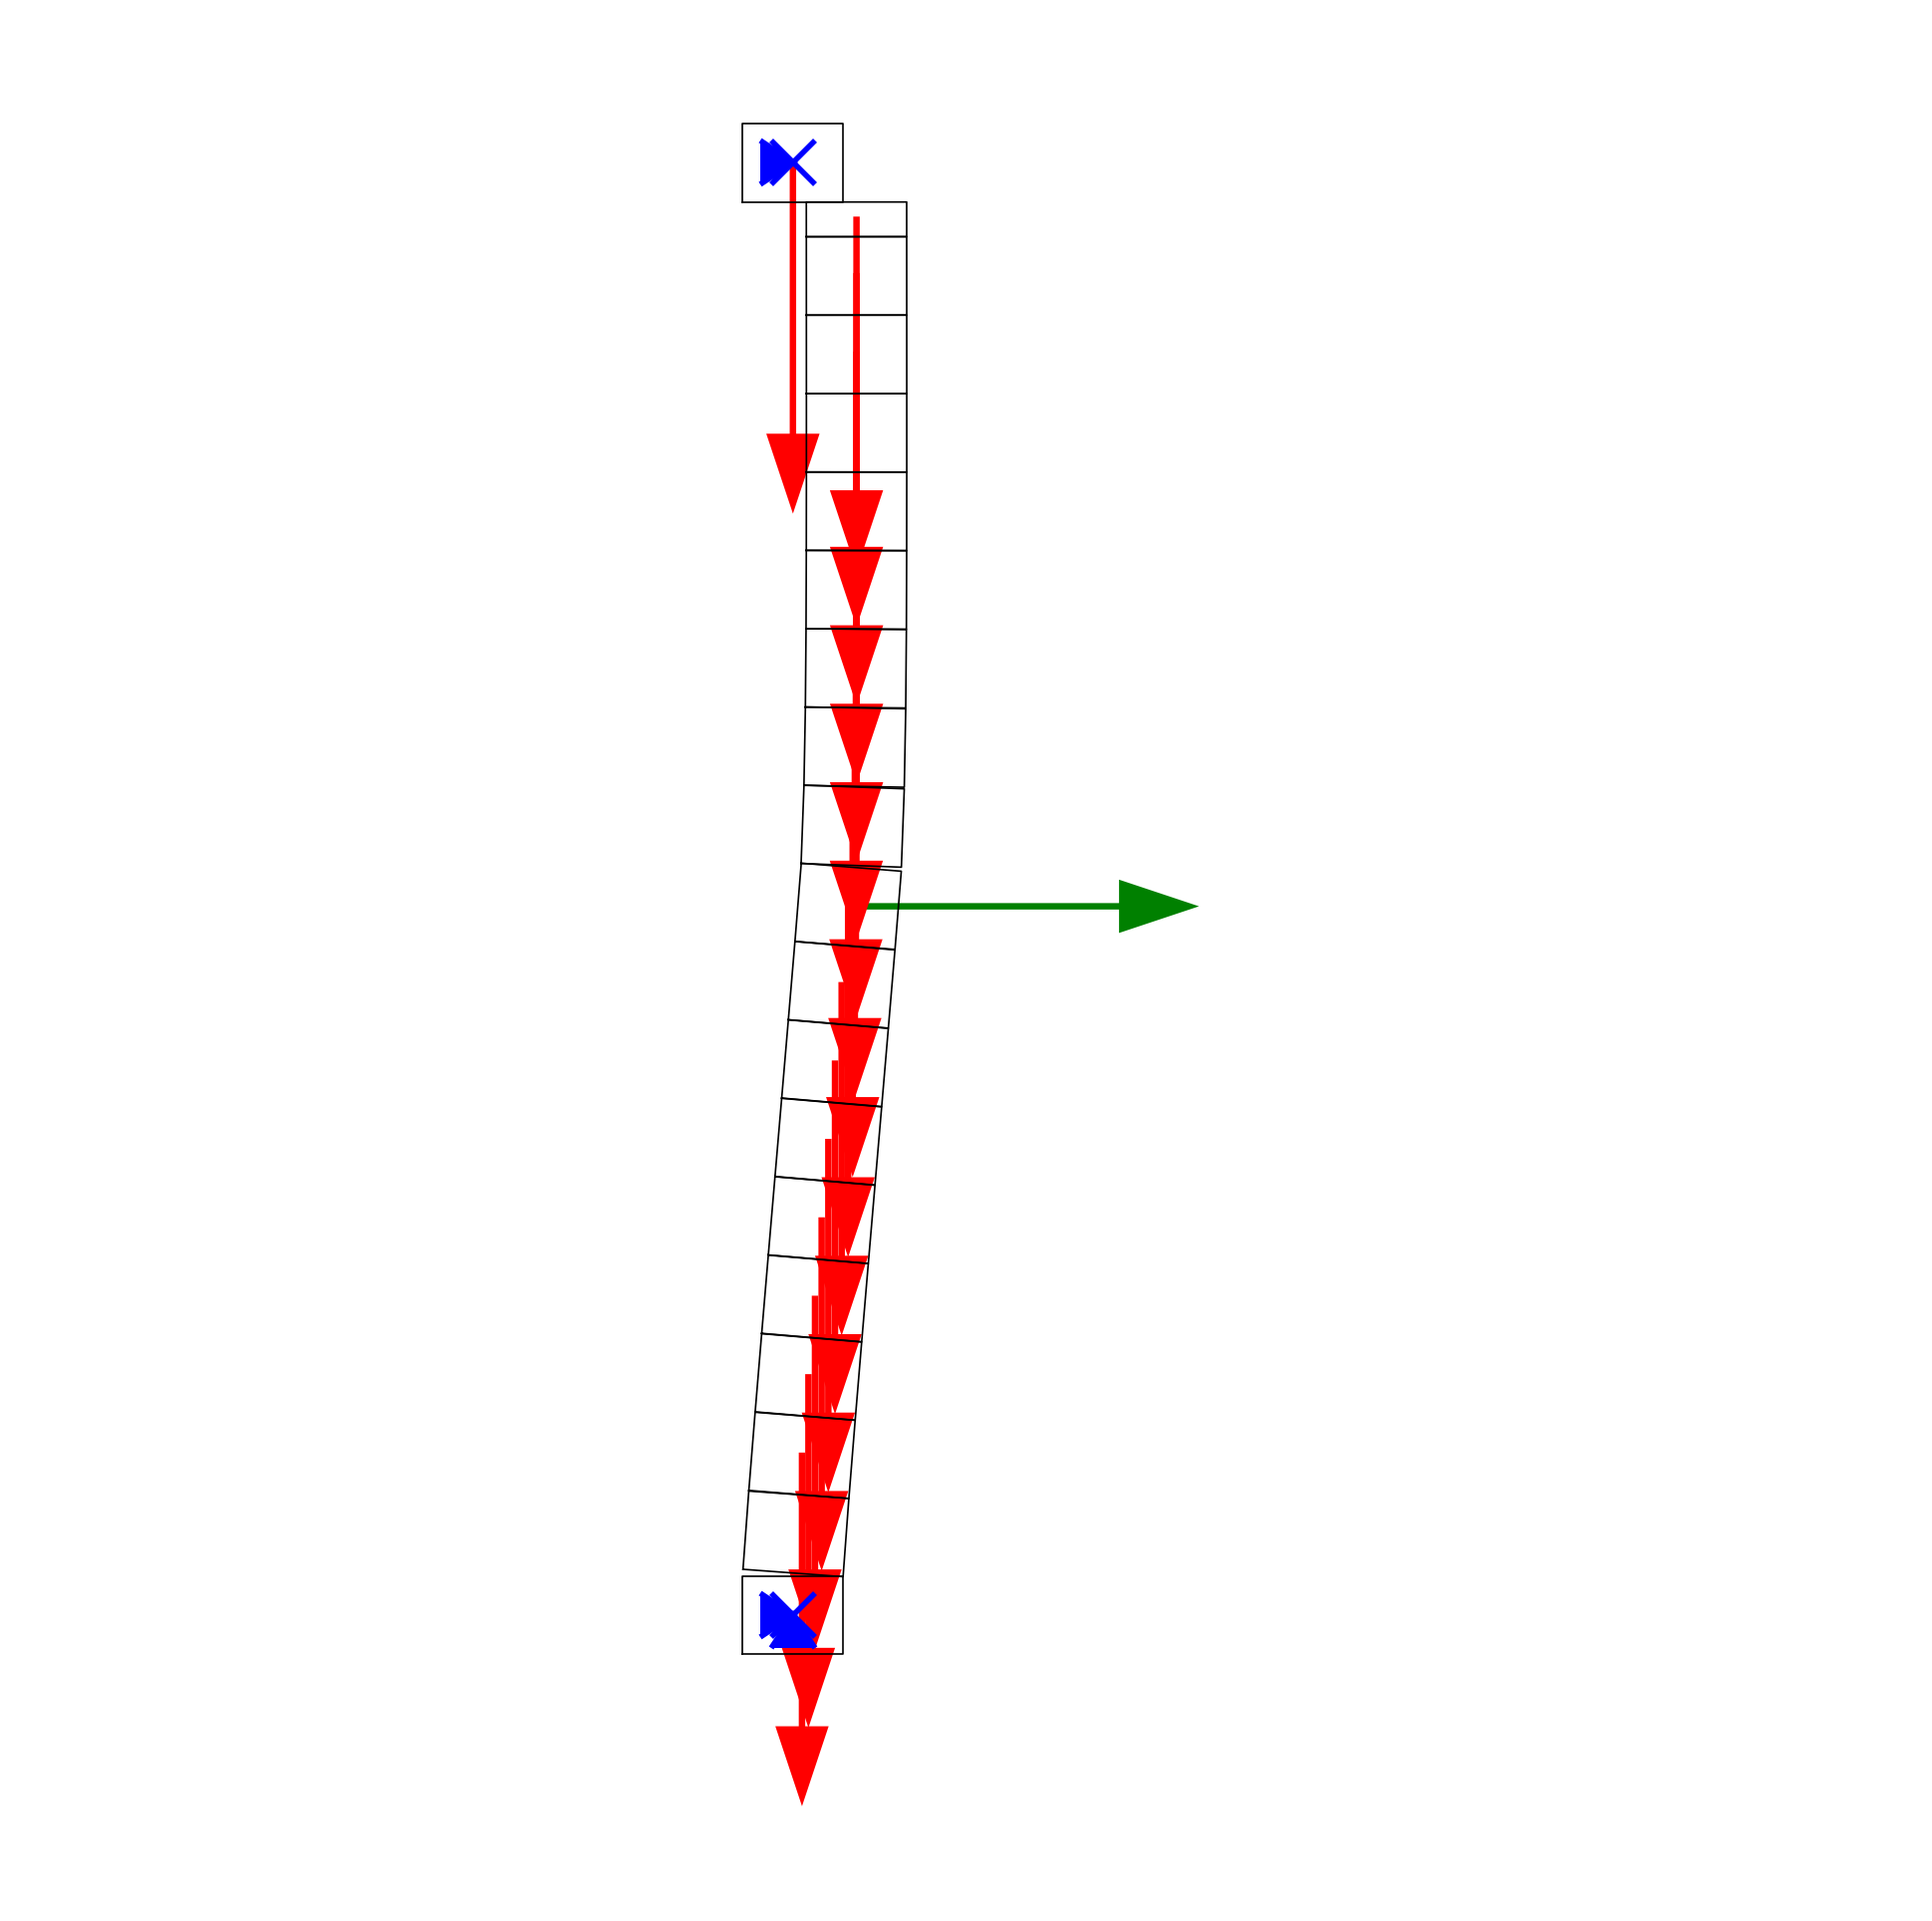

In [16]:
LIST = np.linspace(0, 0.55 * 110e-3, 1000)
St.solve_dispcontrol(LIST.tolist(), 0, 9, 0, dir_name=save_path, filename='results_Griffith_wall_12', max_iter=100)

St.plot_structure(scale=1, plot_cf=False, plot_forces=True)  # structure in the deformed configuration

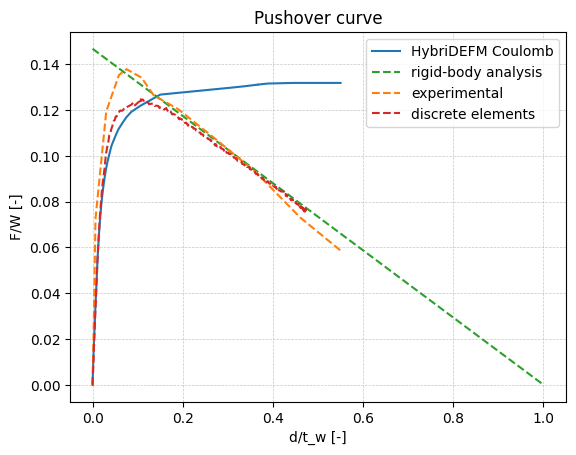

In [17]:
import matplotlib.pyplot as plt
from scipy import interpolate

# Lettura dati da simulazione
with h5py.File("Results_Griffith_wall_12.h5", "r") as hf:
    U = hf["U_conv"][(9) * 3 + 0]
    P = hf["P_r_conv"][(9) * 3 + 0]

d_tw = U / t_w
F_W = P / W_tot

# Plot curva simulazione
plt.plot(d_tw, F_W, label='HybriDEFM Coulomb', color='tab:blue')

labels = ['rigid-body analysis', 'experimental', 'discrete elements']
colors = ['tab:green', 'tab:orange', 'tab:red']

for i in range(1, 4):
    data = np.loadtxt(f'curve_{i}_12.csv', delimiter=',')
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y, label=labels[i - 1], color=colors[i - 1], linestyle='--')

# Grafico finale
plt.title("Pushover curve")
plt.xlabel("d/t_w [-]")
plt.ylabel("F/W [-]")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()